# [Pytorch](https://pytorch.org/docs/stable/index.html)

Usaremos pytorch para un clasificador de texto en inglés para identificar de que trata el texto 

## ¿Por qué pytorch?

"De la busqueda a la producción"

Busca ser user friendly, es de libre uso, pertenece a AMD, AWS, Google Cloud, Meta, Microsoft Azure y Nvidia.

## ¿Cómo se crea un modelo?

La clase [nn](https://pytorch.org/docs/stable/nn.html#loss-functions) (neural network) permite crear un "castillo de legos" para apilar bloques

In [44]:
import torch
import torch.nn as nn

In [45]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        
        # Creación de las capas junto a la definición de sus dimensiones
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # Red neuronal recurrente
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=2, batch_first=True) # Se empieza con todos los lotes
        
        # Capa linear
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, text):
        '''
            Unir los bloques, esta función se hereda de Module
        '''
        
        embedded = self.embedding(text) # Se ingresa el texto del usuario
        
        # Pasar el embedded a la red
        output, (hidden, cell) = self.rnn(embedded)
        
        # Manipular tensor
        final_hidden = hidden[-1]
        
        return self.fc(final_hidden)

In [46]:
# Definir parametros a introducir
vocab_size = 10000
embedding_dim = 100
hidden_dim = 256
output_dim = 2 # Número de clases

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)

In [47]:
model

TextClassifier(
  (embedding): Embedding(10000, 100)
  (rnn): LSTM(100, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=2, bias=True)
)

## Tensores

Recordar que los tensores son muy importantes ya que es la estructura clave para los modelos de IA

- Escalar: ``` 3 ```
- Vector: ``` [1, 2, 3] ```
- Matriz: ``` [[1, 2, 3], [4, 5, 6]] ```

In [48]:
scalar = torch.randn(1)
vector = torch.randn(1, 10) # 1 fila, 10 columnas
matriz = torch.randn(2, 2)

matriz

tensor([[-1.3437, -0.1119],
        [-1.0890,  0.2048]])

In [49]:
tensor = torch.randn(1, 2, 3, 4, dtype=torch.float32) # Por cada 1, hay 2, que tiene 3 donde hay 4...
tensor

tensor([[[[-0.4569,  0.7484, -1.0474, -0.0112],
          [ 1.3176, -0.0621,  1.2072, -1.7601],
          [ 0.2896,  1.4635, -0.5029,  0.6477]],

         [[ 0.6020,  0.7285, -0.3481, -0.1511],
          [-0.3142, -0.6494,  1.9607,  1.9957],
          [-0.3063, -1.6263, -0.7754, -1.0481]]]])

In [50]:
torch.tensor([[[[2, 3, 4],[1, 2, 3]], [[5, 6, 7],[1, 2, 3]]]])

tensor([[[[2, 3, 4],
          [1, 2, 3]],

         [[5, 6, 7],
          [1, 2, 3]]]])

In [51]:
tensor.shape

torch.Size([1, 2, 3, 4])

In [52]:
tensor.ndim

4

In [53]:
tensor.dtype

torch.float32

Tipos de datos

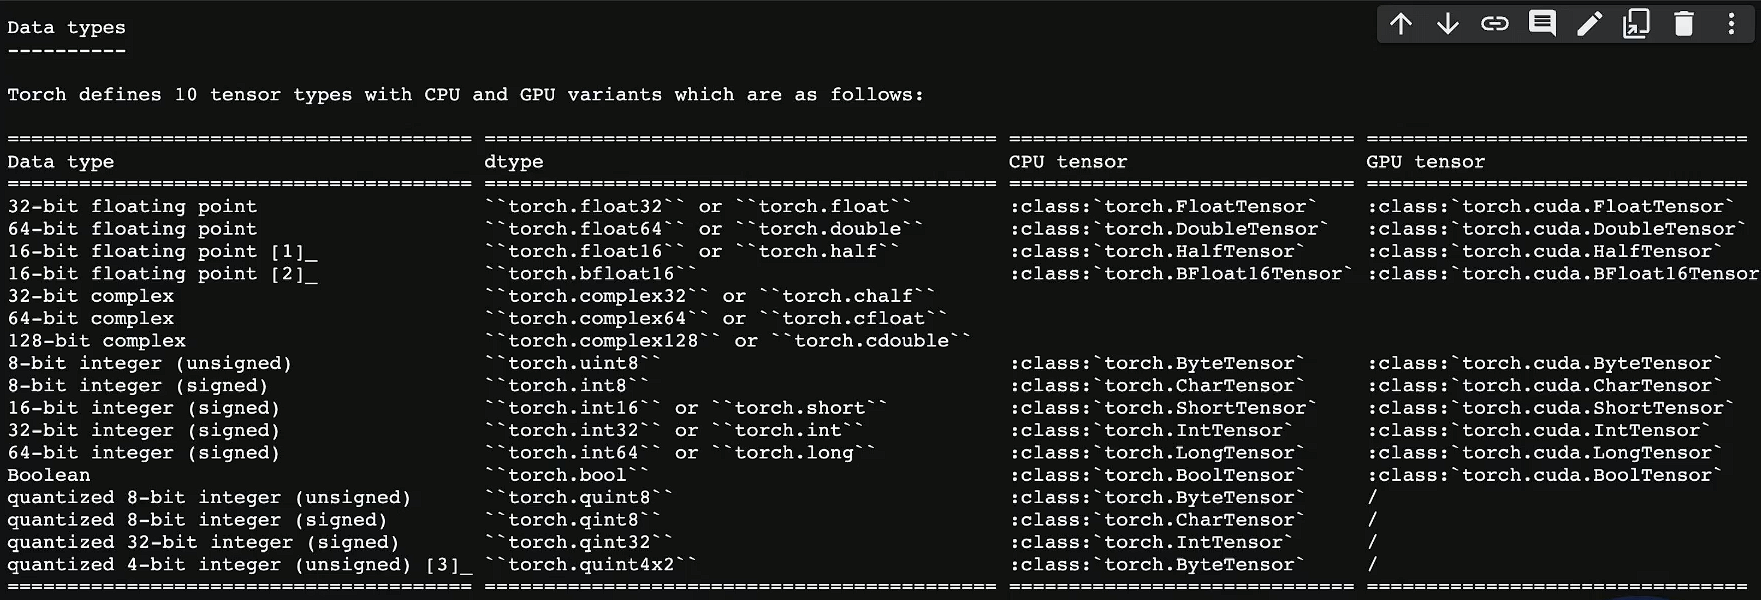

In [54]:
tensor.to(torch.float16)

tensor([[[[-0.4568,  0.7485, -1.0469, -0.0112],
          [ 1.3174, -0.0621,  1.2070, -1.7598],
          [ 0.2896,  1.4639, -0.5029,  0.6475]],

         [[ 0.6021,  0.7285, -0.3481, -0.1511],
          [-0.3142, -0.6494,  1.9609,  1.9961],
          [-0.3064, -1.6260, -0.7754, -1.0479]]]], dtype=torch.float16)

In [55]:
tensor.device

device(type='cpu')

In [56]:
if torch.cuda.is_available():
    tensor_cuda = tensor.to(torch.device("cuda"))
    print(tensor_cuda.type())

In [57]:
import numpy as np

vector = np.ones(5)
torch.from_numpy(vector)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

## Bloques de creación de modelos (Regresión)

In [58]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [59]:
volume = 0.8
sesgo = 0.2

start = 0
final = 1
step = 0.025
X = torch.arange(start, final, step).unsqueeze(dim=1)

y = volume * X + sesgo

X[:10], y[:10]

(tensor([[0.0000],
         [0.0250],
         [0.0500],
         [0.0750],
         [0.1000],
         [0.1250],
         [0.1500],
         [0.1750],
         [0.2000],
         [0.2250]]),
 tensor([[0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]))

In [60]:

train_division = int(0.7 * len(X)) # 70% de los datos
x_train, y_train = X[:train_division], y[:train_division]
x_test, y_test = X[train_division:], y[train_division:]

len(x_train), len(x_test)

(28, 12)

In [61]:
# En caso de querer hacerlo de forma aleatoria

from torch.utils.data import random_split

train_division = int(0.7 * len(X))


generator1 = torch.Generator().manual_seed(42)
generator2 = torch.Generator().manual_seed(42)

x_train, x_test = random_split(X, [train_division, len(X) - train_division], generator1)
y_train, y_test = random_split(y, [train_division, len(X) - train_division], generator2)

x_train = torch.tensor(x_train)
x_test = torch.tensor(x_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

len(x_train), len(x_test)


(28, 12)

In [62]:
def plot_predictions(x_input = x_train,
                     y_input = y_train,
                     x_test = x_test,
                     y_test = y_test,
                     predictions = None):
    plt.figure(figsize=(10,10))
    
    plt.scatter(x_input, y_input, c="g", s=6, label="Datos de entrenamiento")
    plt.scatter(x_test, y_test, c="y", s=6, label="Datos de prueba")
    
    if predictions is not None:
        plt.scatter(x_test, predictions, c="r", s=6, label="Predicciones")
        
    plt.legend(prop={"size":12})        
    

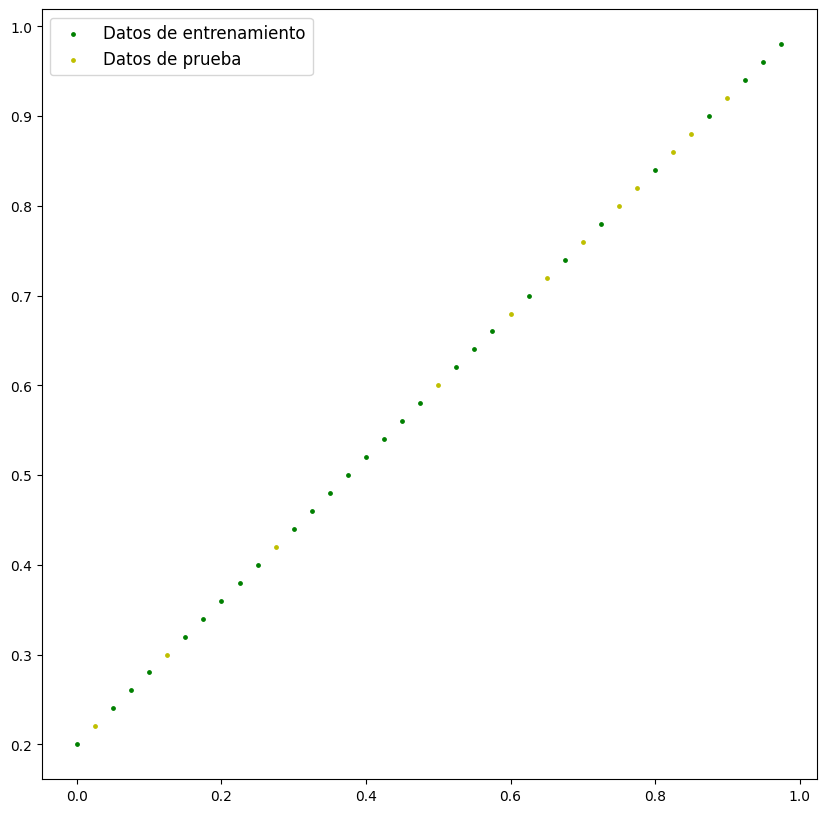

In [63]:
plot_predictions()

In [64]:
class RegressionLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.volume = nn.Parameter(torch.randn(1, dtype=torch.float), 
                                    requires_grad=True) # Es un tensor mejorable (entrenable)
        
        self.sesgo = nn.Parameter(torch.randn(1, dtype=torch.float), 
                                    requires_grad=True) # Es un tensor mejorable (entrenable)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.volume * x + self.sesgo

In [65]:
torch.Generator().manual_seed(42)

model = RegressionLinearModel()
model

RegressionLinearModel()

In [66]:
model.state_dict()

OrderedDict([('volume', tensor([-0.4960])), ('sesgo', tensor([0.7180]))])

Predecir sin haber entrenado

In [67]:
with torch.inference_mode():
    y_pred = model(x_test)

In [68]:
y_pred

tensor([0.4204, 0.3088, 0.5816, 0.2964, 0.3708, 0.4700, 0.3956, 0.3336, 0.3460,
        0.2716, 0.7056, 0.6560])

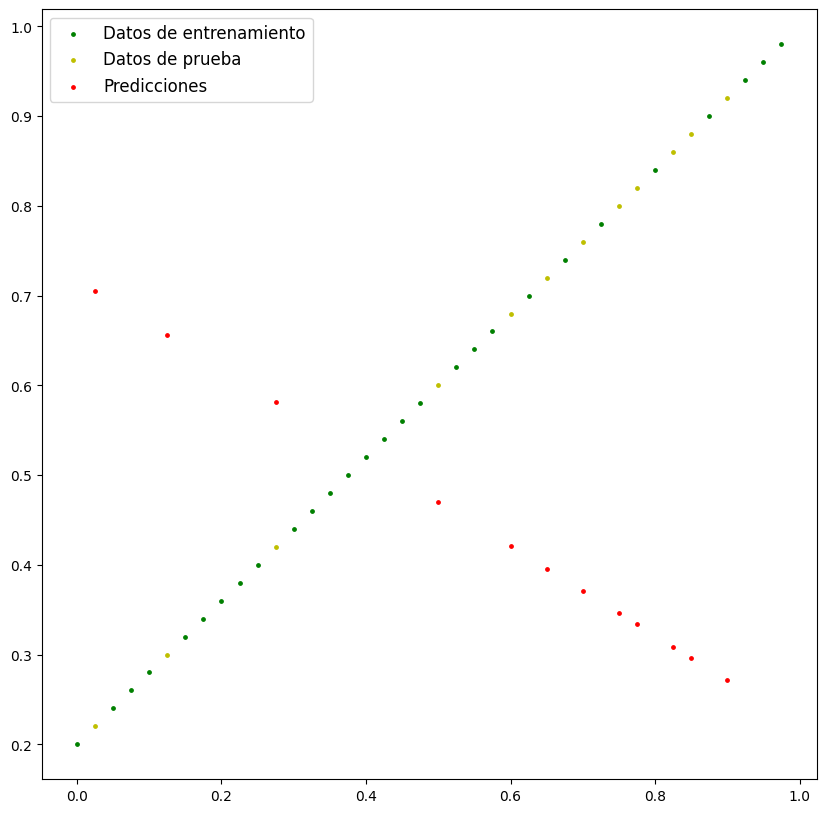

In [69]:
plot_predictions(predictions=y_pred)

### ¿Cómo entrenar un modelo?

In [70]:
# Función de pérdida
f_loss = nn.L1Loss()

# Crear optimizador

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [71]:
torch.manual_seed(42)

epochs = 190

train_loss = []
test_loss = []

for epoch in range(epochs):
    # Poner el modelo en modo entrenamiento
    model.train()
    
    # Tratar de predecir los datos
    y_pred = model(x_train)
    
    # Calcular la pérdida
    loss = f_loss(y_pred, y_train)
    
    # Gradiantes cero del optimizador
    optimizer.zero_grad()
    
    # Pérdida al revés (detectar si los pesos ayudan o desmejoran el modelo)
    loss.backward()
    
    # Mejorar los pesos del modelo
    optimizer.step()
    
    ### Probar el modelo
    model.eval()
    
    with torch.inference_mode():
        # Reenviar datos de prueba
        pred_try = model(x_test)
        
        # Calcular pérdida de test
        loss_try = f_loss(pred_try, y_test)
        
        # Imprimir resultados para ver cómo se está entrenando
        
        if epoch % 10 == 0:
            train_loss.append(loss.detach().numpy())
            test_loss.append(loss_try.detach().numpy())
            print(f"{epoch}    |   Train loss: {loss}   |   Test loss: {loss_try}")
    

0    |   Train loss: 0.30436280369758606   |   Test loss: 0.400799036026001
10    |   Train loss: 0.2987542748451233   |   Test loss: 0.38881340622901917
20    |   Train loss: 0.29324015974998474   |   Test loss: 0.3768277168273926
30    |   Train loss: 0.2877260744571686   |   Test loss: 0.3648420572280884
40    |   Train loss: 0.282858669757843   |   Test loss: 0.35695305466651917
50    |   Train loss: 0.2781679034233093   |   Test loss: 0.35008835792541504
60    |   Train loss: 0.27347710728645325   |   Test loss: 0.3432236611843109
70    |   Train loss: 0.2687862813472748   |   Test loss: 0.3363589346408844
80    |   Train loss: 0.2640955150127411   |   Test loss: 0.3294942378997803
90    |   Train loss: 0.259404718875885   |   Test loss: 0.32262951135635376
100    |   Train loss: 0.2547139525413513   |   Test loss: 0.3157648742198944
110    |   Train loss: 0.25002315640449524   |   Test loss: 0.3089001178741455
120    |   Train loss: 0.24533234536647797   |   Test loss: 0.30203542

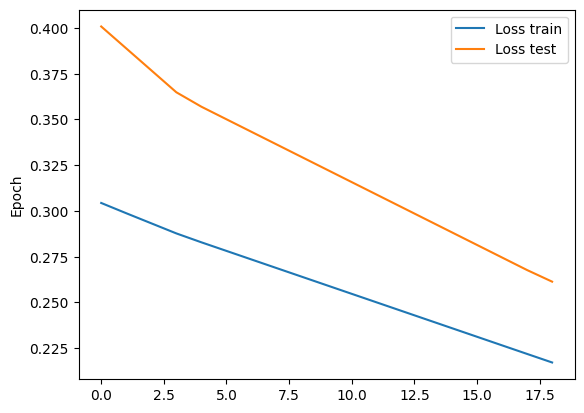

In [72]:
# Curvas de prueba

plt.plot(train_loss, label="Loss train")
plt.plot(test_loss, label="Loss test")
plt.ylabel("Loss")
plt.ylabel("Epoch")
plt.legend()

In [73]:
model.eval()


with torch.inference_mode():
    # model.to(device)
    # x_test = x_test.to(device)
    
    y_pred = model(x_test)

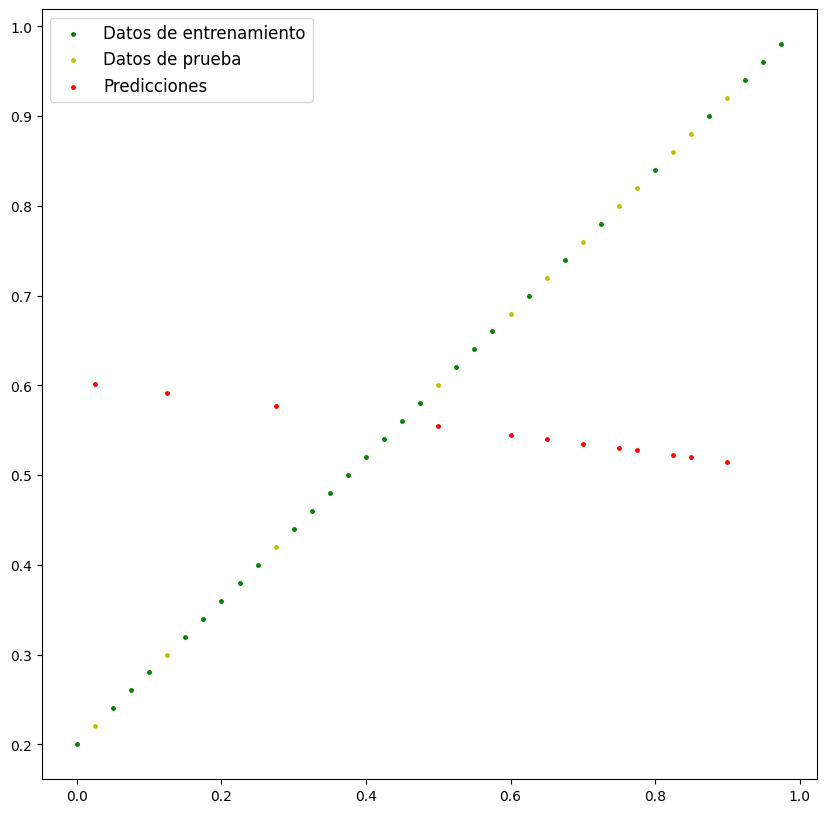

In [74]:
plot_predictions(predictions=y_pred)

## Clasificación de texto

Para esto se usará [torchtex](https://pytorch.org/text/stable/datasets.html#dbpedia), con DBpedia que nos brinda articulos en inglés

In [75]:
import torch
from torchtext.datasets import DBpedia

In [76]:
train_iter = iter(DBpedia(split="train"))

In [77]:
next(train_iter)

(1,
 'E. D. Abbott Ltd  Abbott of Farnham E D Abbott Limited was a British coachbuilding business based in Farnham Surrey trading under that name from 1929. A major part of their output was under sub-contract to motor vehicle manufacturers. Their business closed in 1972.')

### Procesamiento

#### Tokenización

Convertir palabreas, letras o simbolos a números, con esto see creará un vocabulario que se pasará al modelo

In [78]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer("basic_english")

train_iter = DBpedia(split="train")

def yield_tokens(data_iter):
    """Regresa el texto en formato token

    Args:
        data_iter (_type_): _description_
    """
    for label, text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter),
                                  specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [79]:
tokenizer("Hello, how are you? I am a platzi student")

['hello', ',', 'how', 'are', 'you', '?', 'i', 'am', 'a', 'platzi', 'student']

In [80]:
vocab(tokenizer("Hello, how are you? I am a platzi student"))

[7296, 90515, 1506, 47, 578, 2323, 187, 2409, 5, 0, 1078]

In [81]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1

In [82]:
text_pipeline("Hello, I am Juan")

[7296, 90515, 187, 2409, 1794]

#### DataLoader

Este maneja el proceso de iteración a partir de batches

In [83]:
device = torch.device("cpu")

def collate_batch(batch):
    """Función de recopilación de texto

    Args:
        batch (_type_): _description_

    Returns:
        _type_: _description_
    """
    label_list = []
    text_list = []
    offsets = [0] # Posición de inicio del tensor
    
    for (_label, _text) in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))
        
    label_list = torch.tensor(label_list, dtype = torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0) # Suma acumulativa por filas
    text_list = torch.cat(text_list)
    
    return label_list.to(device), text_list.to(device), offsets.to(device)

In [84]:
from torch.utils.data import DataLoader

dataloader = DataLoader(train_iter, 
                        batch_size=8, 
                        shuffle=False, 
                        collate_fn=collate_batch)

### Creación del modelo

In [85]:
import torch.nn.functional as F # Funciones de fundamentos de las redes
from torch import nn

class TextClassifierModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassifierModel, self).__init__()
        
        # Capa de incrustación 
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim)
        
        # Capa de normalización por lotes (batch normalization)
        self.bn1 = nn.BatchNorm1d(embed_dim)
        
        # Capa completamente conectada
        self.fc = nn.Linear(embed_dim, num_class)
        
    def forward(self, text, offsets):
        # Incrustar el texto
        embedded = self.embedding(text, offsets)
        
        # Aplicar la normalización
        embedded_norm = self.bn1(embedded)
        
        # Aplicar función de activación ReLU
        embedded_activated = F.relu(embedded_norm)
        
        return self.fc(embedded_activated)

In [86]:
train_iter = DBpedia(split="train")
num_class = len(set([label for (label, text) in train_iter]))
vocab_size = len(vocab)
embedding_dim = 100

model = TextClassifierModel(vocab_size, embedding_dim, num_class).to(device)
model

TextClassifierModel(
  (embedding): EmbeddingBag(802998, 100, mode='mean')
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=100, out_features=14, bias=True)
)

In [87]:
def countParameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


f"El modelo tiene {countParameters(model):,} parametros"

'El modelo tiene 80,301,414 parametros'

In [88]:
EPOCHS = 3
L_R = 0.2
BATCH_SIZE = 64

In [89]:
criter = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=L_R)

### Dividir los datos

In [90]:
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset

train_iter, test_iter = DBpedia()

# Convertir el dataset para poder usarlo en el DataLoader
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)

num_train = int(len(train_dataset) * 0.95)

split_train_, split_valid_ = random_split(train_dataset, [num_train, len(train_dataset)-num_train])

train_dataloader = DataLoader(split_train_, BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

### Entrenamiento

In [91]:
def train(dataloader):
    # Poner modelo en modo entrenamiento
    model.train()
    
    # Parametros de evaluación
    epoch_acc = 0
    epoch_loss = 0
    total_count = 0
    
    for index, (label, text, offsets) in enumerate(dataloader):
        # Reestablecer gradientes
        optimizer.zero_grad()
        
        # Obtener predicciones
        y_pred = model(text, offsets)
        
        loss = criter(y_pred, label)
        loss.backward() # Obtener derivada y calcular loss dependiendo de los pesos
        
        acc = (y_pred.argmax(1) == label).sum()
        
        # Evitar que los gradientes sean muy grandes
        nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        
        # Actualizar pesos
        optimizer.step()
        
        # Llevar conteo de la pérdida y el accuracy
        epoch_acc += acc.item()
        epoch_loss += loss.item()
        total_count += label.size(0) # Número total de ejemplos que se tienen
        
        if index % 10 == 0 and index > 0:
            print(f"Epoch: {epoch}  |   {index}/{len(dataloader)} batches   | loss: {epoch_loss/total_count}    |   acc: {epoch_acc/total_count}")
            

    return epoch_acc/total_count, epoch_loss/total_count

### Evaluación

In [92]:
def evaluate(dataloader):
    model.eval()
    
    epoch_acc = 0
    epoch_loss = 0
    total_count = 0
    
    with torch.no_grad():
        for index, (label, text, offsets) in enumerate(dataloader):
            y_pred = model(text, offsets)
            
            loss = criter(y_pred, label)
            acc = (y_pred.argmax(1) == label).sum()
            
            epoch_acc += acc.item()
            epoch_loss += loss.item()
            total_count += label.size(0)
            
    return epoch_acc/total_count, epoch_loss/total_count            
            

In [93]:
major_loss_validation = float("inf")

for epoch in range(1, EPOCHS + 1):
    # Entrenamiento
    train_acc, train_loss = train(train_dataloader)
    
    # Validación
    val_acc, val_loss = evaluate(valid_dataloader)
    
    if val_loss < major_loss_validation:
        best_valid_loss = val_loss
        torch.save(model.state_dict(), "best_weigths.pt")

Epoch: 1  |   10/8313 batches   | loss: 0.04125485467639836    |   acc: 0.10227272727272728
Epoch: 1  |   20/8313 batches   | loss: 0.04130810658846583    |   acc: 0.1056547619047619
Epoch: 1  |   30/8313 batches   | loss: 0.04107144390863757    |   acc: 0.11441532258064516
Epoch: 1  |   40/8313 batches   | loss: 0.0409114593412818    |   acc: 0.11966463414634146
Epoch: 1  |   50/8313 batches   | loss: 0.04068475844813328    |   acc: 0.12959558823529413
Epoch: 1  |   60/8313 batches   | loss: 0.040402325633607926    |   acc: 0.1416495901639344
Epoch: 1  |   70/8313 batches   | loss: 0.04018732580080838    |   acc: 0.15030809859154928
Epoch: 1  |   80/8313 batches   | loss: 0.039954279675895786    |   acc: 0.16010802469135801
Epoch: 1  |   90/8313 batches   | loss: 0.03973015610660825    |   acc: 0.17067307692307693
Epoch: 1  |   100/8313 batches   | loss: 0.03947898716029554    |   acc: 0.18378712871287128
Epoch: 1  |   110/8313 batches   | loss: 0.03924082978083207    |   acc: 0.19566

KeyboardInterrupt: 

In [94]:
test_acc, test_loss = evaluate(test_dataloader)

f"Accuracy: {test_acc}, Loss: {test_loss}"

'Accuracy: 0.7414857142857143, Loss: 0.01329293935426644'

### Inferencia

In [97]:
DBpedia_label = {1: 'Company',
                2: 'EducationalInstitution',
                3: 'Artist',
                4: 'Athlete',
                5: 'OfficeHolder',
                6: 'MeanOfTransportation',
                7: 'Building',
                8: 'NaturalPlace',
                9: 'Village',
                10: 'Animal',
                11: 'Plant',
                12: 'Album',
                13: 'Film',
                14: 'WrittenWork'}

def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        # opt_mod = torch.compile(model, mode="reduce-overhead")
        output = model(text, torch.tensor([0]))
        return output.argmax(1).item() +1 
    
ejemplo_1 = "Nithari is a village in the western part of the state of Uttar Pradesh India bordering on New Delhi. Nithari forms part of the New Okhla Industrial Development Authority's planned industrial city Noida falling in Sector 31. Nithari made international news headlines in December 2006 when the skeletons of a number of apparently murdered women and children were unearthed in the village."

print(f"El ejemplo 1 es de categoría {DBpedia_label[predict(ejemplo_1, text_pipeline)]}")

El ejemplo 1 es de categoría WrittenWork


### Guardar el modelo

In [103]:
state_state_dict = model.state_dict()
optimizer_state_dict = optimizer.state_dict()

checkpoint = {
    "model_state_dict":state_state_dict,
    "optimizer_state_dict":optimizer_state_dict,
    "epoch":epoch,
    "loss":train_loss
}

torch.save(checkpoint, "./models/TextClassiffierPytorchV1.pth")

### Subir el modelo

In [100]:
%%capture
!pip install huggingface_hub

In [102]:
!huggingface-cli login

^C


In [ ]:
from huggingface_hub import HfApi
api = HfApi()

api.create_repo(repo_id="Ruta/nombre_repo")

In [ ]:
api.upload_file(
    path_or_fileobj="./models/TextClassiffierPytorchV1.pt",
    path_in_repo="TextClassiffierPytorchV1.pt",
    repo_id="Ruta/nombre_repo"
)

### Cargar modelo

In [104]:
checkpoint = torch.load("./models/TextClassiffierPytorchV1.pth")

In [105]:
train_iter = DBpedia(split="train")
num_class = len(set([label for (label, text) in train_iter]))
vocab_size = len(vocab)
embedding_dim = 100

model = TextClassifierModel(vocab_size, embedding_dim, num_class).to(device)
model

TextClassifierModel(
  (embedding): EmbeddingBag(802998, 100, mode='mean')
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=100, out_features=14, bias=True)
)

In [106]:
optimizer = torch.optim.SGD(model.parameters(), lr=L_R)

In [107]:
model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [108]:
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])